### 単回帰分析の実装

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
# csvファイルの読み込み
df = pd.read_csv('sample.csv')

In [13]:
df

,x,y
0,40.362,137500.0
1,40.686,132500.0
2,38.430,93000.0
3,36.822,96500.0
4,37.002,100500.0
...,...,...
95,47.250,250000.0
96,43.722,166500.0
97,42.642,151500.0
98,43.644,173000.0


In [14]:
x = df['x']
y = df['y']

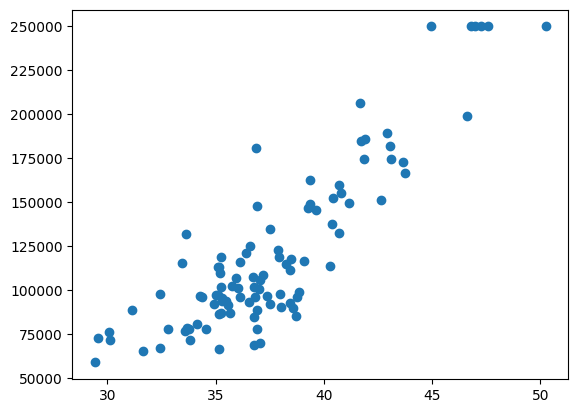

In [20]:
# 散布図を描画
plt.scatter(x,y)
plt.show()

データの中心化

In [16]:
# データの概要を表示
df.describe()

,x,y
count,100.000000,100.000000
mean,37.622220,121065.000000
std,4.087547,47174.009226
min,29.418000,59000.000000
25%,35.151000,90375.000000
50%,36.909000,104250.000000
75%,39.439500,147250.000000
max,50.250000,250000.000000


In [17]:
df.mean()

x        37.62222
y    121065.00000
dtype: float64

In [21]:
# 中心化したデータ
df_c = df - df.mean()

In [22]:
df_c.head()

,x,y
0,2.73978,16435.0
1,3.06378,11435.0
2,0.80778,-28065.0
3,-0.80022,-24565.0
4,-0.62022,-20565.0


In [23]:
df_c.describe()

,x,y
count,1.000000e+02,100.000000
mean,2.096101e-15,0.000000
std,4.087547e+00,47174.009226
min,-8.204220e+00,-62065.000000
25%,-2.471220e+00,-30690.000000
50%,-7.132200e-01,-16815.000000
75%,1.817280e+00,26185.000000
max,1.262778e+01,128935.000000


In [24]:
x = df_c['x']
y = df_c['y']

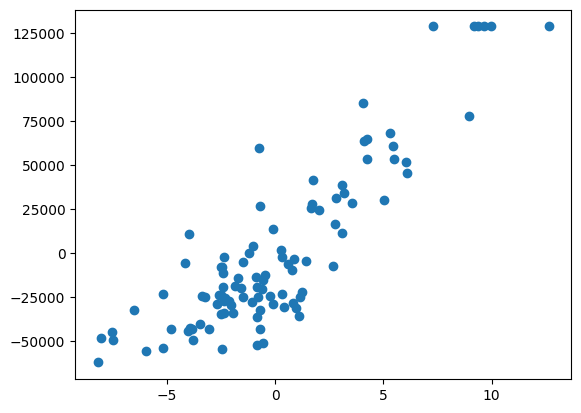

In [25]:
# 中心化したデータの散布図を描画
plt.scatter(x,y)
plt.show()

パラメータ$a$の計算
傾き$a$の計算式
$$
a = \dfrac{\sum_{n-1}^{N}x_ny_n}{\sum_{n-1}^{N}x_n^2}

$$

In [26]:
xx = x * x

In [27]:
xy = x * y

In [28]:
a = xy.sum() / xx.sum()

In [29]:
a

10069.022519284063

$$
\hat{y}=ax
$$

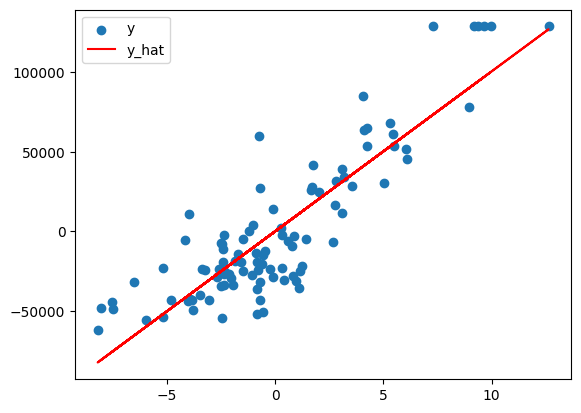

In [32]:
# プロットして確認
plt.scatter(x,y,label='y') # 実測値
plt.plot(x, a*x, label='y_hat', color='red') # 予測値
plt.legend()
plt.show()

予測値の計算

In [33]:
x_new = 40 # 40平米の部屋

In [34]:
mean = df.mean()

In [45]:
mean['x']

37.62222

In [38]:
# 中心化
xc = x_new - mean['x']

In [39]:
xc

2.3777800000000013

In [41]:
# 単回帰分析による予測
yc = a * xc

In [42]:
yc

23941.920365903272

In [46]:
mean['y']

121065.0

In [43]:
y_hat = a * xc + mean['y']

In [44]:
y_hat

145006.92036590326

予測値を計算する関数

In [47]:
def predict(x):
    # 定数項
    a = 10069.022519284063
    xm = 37.62222
    ym = 121065.0
    # 中心化
    xc = x - xm
    # 予測値の計算
    y_hat = a * xc + ym
    return y_hat

In [48]:
predict(40)

145006.92036590326

In [50]:
# 学習データ外のデータのため変な予測値が出る（外挿）
predict(25)

-6028.417423357663

In [51]:
predict(30)

44316.695173062646